In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [4]:
#General parameters
years = 16
dt = 15
time = int(261 * years)

#Simulation parameters
yearly_return = 1.07

daily_return = 1.001
daily_loss = 1 - 0.01

gain_phase = 0.7
loss_phase = 1 - gain_phase

mode = "fixed_gain_phase"
#mode = "fixed_return"
 

#Tade parameters
trades = 12 * years
max_trades = 20 * years
hold_time = 20
time_after_reversel = 0
smooth_period = 20

trade_coast = 1
spread = 0.002
tax_rate = 0.025
tax_allowance = 1000

initial_investment = 5000
saving_plan = 500
saving_plan_period = 22


sim = ChartSimulation(yearly_return=yearly_return, daily_return=daily_return, daily_loss=daily_loss, gain_phase=gain_phase, loss_phase=loss_phase, mode=mode, 
                      initial_investment=initial_investment, saving_plan=saving_plan, saving_plan_period=saving_plan_period,  dt=dt, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, phase = sim.simulate_performance()

buy_and_hold_performance = sim.buy_and_hold(set='simulation')[0]
random_swing_performance_analyse = sim.random_swing_trade_ana(set='simulation')[0]
swing_performance_analyse = sim.swing_trade_ana(set='simulation')[0]

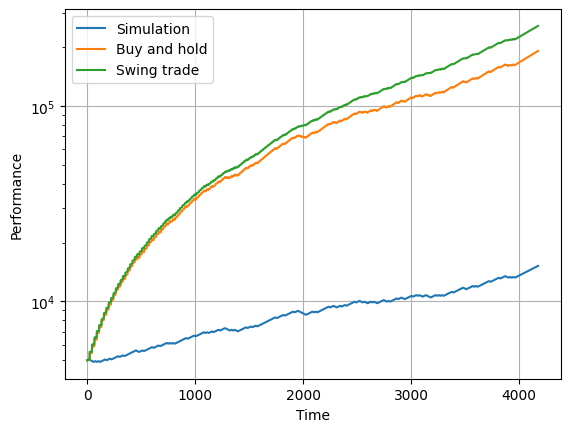

Initial invetment:  5000
Total Investment:  99500

Index performance:
    Absolute: 15193.691, Relative: 3.039
    Yearly performance: 1.072

Buy and hold return:
    Absolute: 190778.372, Relative: 1.917
    Yearly performance: 1.042, Internal rate of return: 1.073
    Taxes: 0, Transaction cost: 199.998

Swing trade return:
    Absolute: 256299.48, Relative: 2.576
    Yearly performance: 1.061, Internal rate of return: 1.105
    Taxes: 3071.203, Transaction cost: 11265.732

Random swing trade return:
    Absolute: 103435.953, Relative: 1.04
    Yearly performance: 1.002, Internal rate of return: 1.005
    Taxes: 411.254, Transaction cost: 20932.927

Best return:  33739.056


In [5]:
plt.plot(performance, label="Simulation")
plt.plot(buy_and_hold_performance, label="Buy and hold")
plt.plot(swing_performance_analyse, label="Swing trade")
#plt.plot(random_swing_performance_analyse, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

plt.yscale("log")

plt.show()


#sim.print_parameters()
sim.print_results(accuracy=3)
#sim.plot_performance()

In [6]:
mc = MonteCarloSimulation(chartsim=sim, parallel=True)
_ = mc.mc_artificial_chart(n=500)

# mc.hist_performance(bins=30)

100%|██████████| 500/500 [00:45<00:00, 11.02it/s]


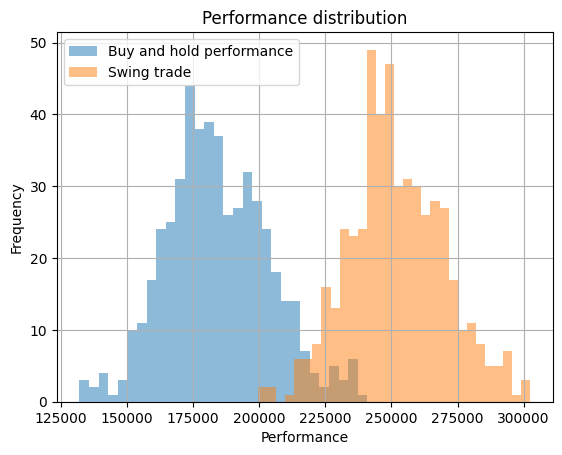

Initial invetment:  5000
Total money invested:  99500

Index performance:
  Overall return: 14730.689 +/- 2316.036 (Median: 14332.846)
  Relative performance: 2.946 +/- 0.463 (Median: 2.867)
  Yearly performance: 1.069 +/- 0.01 (Median: 1.068)

Buy and hold return:
  Overall return: 184355.474 +/- 19461.569 (Median: 182760.619)
  Relative performance: 1.853 +/- 0.196 (Median: 1.837)
  Yearly performance: 1.039 +/- 0.007 (Median: 1.039)
  Internal rate of return: 1.069 +/- 0.011 (Median: 1.069)
  Taxes: 0.0 +/- 0.0 (Median: 0.0)
  Transaction cost: 199.998 +/- 0.0 (Median: 199.998)

Swing trade return:
  Overall return: 251898.031 +/- 18024.556 (Median: 249977.666)
  Relative performance: 2.532 +/- 0.181 (Median: 2.512)
  Yearly performance: 1.06 +/- 0.005 (Median: 1.059)
  Internal rate of return: 1.102 +/- 0.007 (Median: 1.102)
  Taxes: 3651.7 +/- 446.757 (Median: 3617.98)
  Transaction cost: 11488.582 +/- 928.101 (Median: 11502.369)

Random swing trade return:
  Overall return: 10424

In [7]:


bins=30
limits=None

#plt.hist(mc.index_performance, bins=bins, range=limits, alpha=0.5, label="Index Performance")
plt.hist(mc.buy_and_hold_profit, bins=bins, range=limits, alpha=0.5, label="Buy and hold performance")
plt.hist(mc.swing_profit, bins=bins, range=limits, alpha=0.5, label="Swing trade")
#plt.hist(mc.random_swing_profit, bins=bins, range=limits, alpha=0.5, label="Random swing trade")

plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance distribution")

plt.grid()
plt.legend()
plt.show()

mc.print_results(accuracy=3)